In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow, fig_arrow
from pyfonts import load_google_font
from pypalettes import load_cmap

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [2]:
# Data Path
food_path = r"..\data\food_protein_calorie_category.csv"

# Data
food = pd.read_csv(food_path)

In [3]:
# Copy dataframe for safety
df = food.copy()

df.head(2)

,food,Energy,Protein,Total lipid (fat),Protein_per_100Cal,Fat_per_100Cal,category
0,"Almond butter, creamy",623.983038,20.78734,53.040,3.331395,8.500231,Nuts
1,"Almond milk, unsweetened, plain, refrigerated",19.330000,0.65625,1.558,3.394982,8.060010,Nuts


In [4]:
# Colors (hex)
CATEGORY_COLOR = {
    "Poultry & Fish": "#2F6FFF",  # blue
    "Cereals":        "#FF8A2A",  # orange
    "Nuts":           "#E13B3B",  # red
    "Soya":           "#2FA84F",  # green
    "Other":          "#f5f3f4",  # grey (fallback)
}

df["color"] = df["category"].map(CATEGORY_COLOR).fillna(CATEGORY_COLOR["Other"])

In [6]:
# Fonts

rb_reg = load_google_font("Roboto Condensed")
rb_it = load_google_font("Roboto Condensed", italic=True)
rb_b = load_google_font("Roboto Condensed", weight=400)
rb_thin = load_google_font("Roboto Condensed", weight=100)


# Colors
color_hex = {
    "grey":"#f5f3f4",
    "black":"#333333",
    "offwhite":"#ffffff",
    "charcoal":"#212529"
}

# Axis text styling
text_style_axis = dict(font=rb_b, color=color_hex["charcoal"], fontsize=18, va="center", ha="center")
text_style_axis_labels = dict(font=rb_b, color=color_hex["charcoal"], fontsize=11, va="center", ha="center")

# Axis labels
x_ax_ticks = list(range(100, 800, 100))
x_ax_label = list(map(str, list(range(100, 800, 100))))

y_ax_ticks = list(range(5, 30, 5))
y_ax_label = list(map(str, list(range(5, 30, 5))))

In [7]:
# Title
title = "Protein Practicality"

# Sub-title
subtitle = "Nuts, lentils and legumes contain protein—\nbut not enough per calorie."

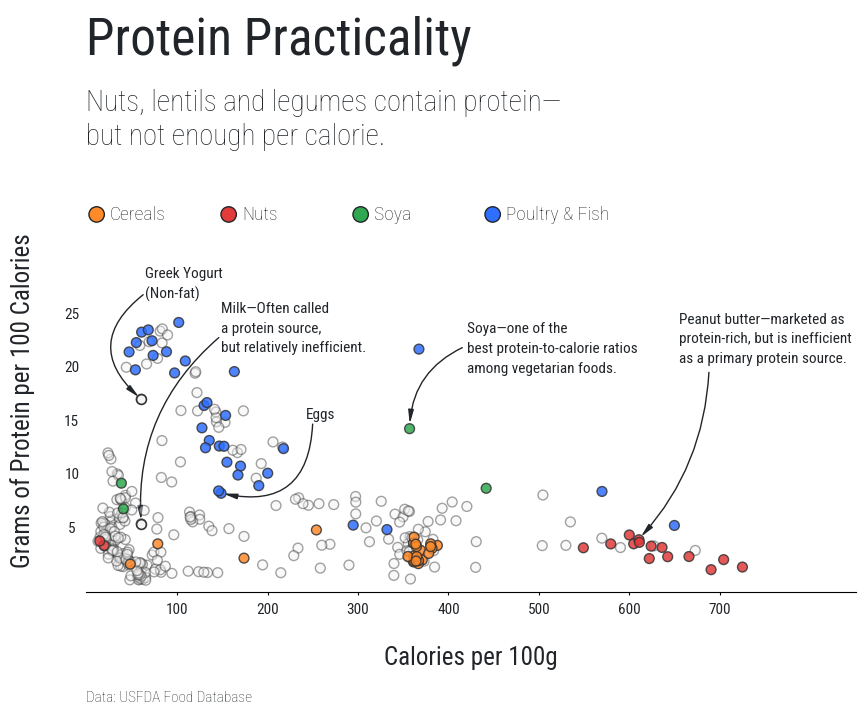

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))

# Set up canvas
fig.subplots_adjust(left=0.15, right=0.85, top=0.7, bottom=0.15)

fig.set_facecolor(color_hex["offwhite"])
ax.set_facecolor(color_hex["offwhite"])

# Clean up canvas
ax.tick_params(axis="y", which="both", length=0, pad=10)
ax.tick_params(axis="x", which="both", length=2, pad=10)
ax.ticklabel_format(axis='y', style='plain')
ax.spines[["top", "right", "left"]].set_visible(0)

# Axis labels
ax.set_xlabel("\nCalories per 100g", labelpad=20, **text_style_axis)
ax.set_xticks(
      x_ax_ticks,
      labels=x_ax_label, **text_style_axis_labels)

ax.set_ylabel("Grams of Protein per 100 Calories\n", labelpad=20, **text_style_axis)
ax.set_yticks(
      y_ax_ticks,
      labels=y_ax_label, **text_style_axis_labels)

ax.set_ylim(bottom=-1, top=35)
ax.set_xlim(left=-1, right=850)

# Title & Subtitle
fig_text(s=title, x=0.15, y=0.975, ha="left",
         size=37, font=rb_b, color=color_hex["charcoal"])

fig_text(s=subtitle, x=0.15, y=.87, ha="left",
         size=21, font=rb_thin, color=color_hex["charcoal"])

fig_text(s="Data: USFDA Food Database", x=0.15, y=.01, ha="left",
         size=11, font=rb_thin, color=color_hex["charcoal"])



# Grey tones
df_grey = df[df["color"]==CATEGORY_COLOR.get("Other")]
ax.scatter(
    x=df_grey["Energy"], y=df_grey["Protein_per_100Cal"],
    c=df_grey["color"], s=50, alpha=0.45,
    linewidths=1, edgecolor=color_hex["black"],
    zorder=5
)
# Colored tones
df_colored = df[df["color"]!=CATEGORY_COLOR.get("Other")]
ax.scatter(
    x=df_colored["Energy"], y=df_colored["Protein_per_100Cal"],
    c=df_colored["color"], s=50, alpha=0.85,
    linewidths=1, edgecolor=color_hex["black"],
    zorder=10
)
# Milk, Greek yogurt
selected_x, selected_y = [60.333333, 60.333333], [5.428177,17.071823]
ax.scatter(
    x=selected_x, y=selected_y,
    c=CATEGORY_COLOR.get("Other"), s=50, alpha=1,
    linewidths=1.2, edgecolor=color_hex["black"],
    zorder=10
)

# Custom legend
legend_items = ["Cereals", "Nuts", "Soya", "Poultry & Fish"]
y_leg = 0.69
x0 = 0.16

# "circle" size in figure coords (use width, then correct height by fig aspect)
w = 0.014
fig_w, fig_h = fig.get_size_inches()
h = w * (fig_w / fig_h)   # aspect correction -> looks like a true circle

gap_after_dot = 0.012
item_gap = 0.12

x = x0
for name in legend_items:
    fig.add_artist(
        Ellipse(
            (x, y_leg),
            width=w, height=h,
            transform=fig.transFigure,
            facecolor=CATEGORY_COLOR[name],
            edgecolor=color_hex["charcoal"],
            linewidth=1,
            zorder=50
        )
    )
    fig.text(
        x + gap_after_dot, y_leg, name,
        transform=fig.transFigure,
        ha="left", va="center",
        font=rb_thin, fontsize=14,
        color=color_hex["charcoal"],
        zorder=50
    )
    x += item_gap

# Annotations
# Soya
soya_pos = (357, 14.5)
ax_arrow(head_position=soya_pos, tail_position=(418, 22),
         radius=0.3, head_width=1.6, color=color_hex["charcoal"])
soya_text = "Soya—one of the\nbest protein-to-calorie ratios\namong vegetarian foods."
ax_text(x=420, y=24.3, s=soya_text, font=rb_reg, color=color_hex["charcoal"], size=11)

# Peanut Butter
peanut_pos = (610.516503, 4)
ax_arrow(head_position=peanut_pos, tail_position=(688, 19.84),
         radius=-0.18, head_width=1.6, color=color_hex["charcoal"])
peanut_text = "Peanut butter—marketed as\nprotein-rich, but is inefficient\nas a primary protein source."
ax_text(x=655, y=25.2, s=peanut_text, font=rb_reg, color=color_hex["charcoal"], size=11)

# Milk
milk_pos = (60.333333, 5.5)
ax_arrow(head_position=milk_pos, tail_position=(148.5, 23),
         radius=0.25, head_width=1.6, color=color_hex["charcoal"])
milk_text = "Milk—Often called\na protein source,\nbut relatively inefficient."
ax_text(x=148.5, y=26.2, s=milk_text, font=rb_reg, color=color_hex["charcoal"], size=11)

# Egg (146, 8.6)
egg_pos = (148, 8.3)
ax_arrow(head_position=egg_pos, tail_position=(250, 15),
         radius=-0.6, head_width=1.6, color=color_hex["charcoal"])
egg_text = "Eggs"
ax_text(x=242, y=16.3, s=egg_text, font=rb_reg, color=color_hex["charcoal"], size=11)

# Greek Yogurt (Non-fat) (60.333333, 17.071823)
gy_pos = (60.333333, 17.071823)
ax_arrow(head_position=gy_pos, tail_position=(65, 27),
         radius=0.6, head_width=1.6, color=color_hex["charcoal"])
gy_text = "Greek Yogurt\n(Non-fat)"
ax_text(x=65, y=29.5, s=gy_text, font=rb_reg, color=color_hex["charcoal"], size=11)


save_path = r"../viz/protein_practicality.jpeg"
dpi = 200
plt.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=1)

---